<a href="https://colab.research.google.com/github/DaVinciMilanj/PresenceAI/blob/main/presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ultralytics
!pip install insightface
!pip install onnxruntime
# !pip install onnxruntime-gpu insightface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 33.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 57.2 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp312-cp312-linux_x86_64.whl size=1070145 sha256=9a9a1db3f0923c728addce3d54e71950b12b6d3d4ed57ddc93a15493f344828a
  Stored in directory: /root/.cache/pip/wheels/73/3c/e2/6d4815e8a8b33a2006554d65ce0d1f973e768f4c7a222fa675
Successfully built insightface
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 103.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.5 MB/s eta 0:00:00


Saving 2_28_s.jpg to 2_28_s.jpg
Image path: 2_28_s.jpg

image 1/1 /content/2_28_s.jpg: 384x640 5 persons, 3 ties, 6.4ms
Speed: 2.0ms preprocess, 6.4ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


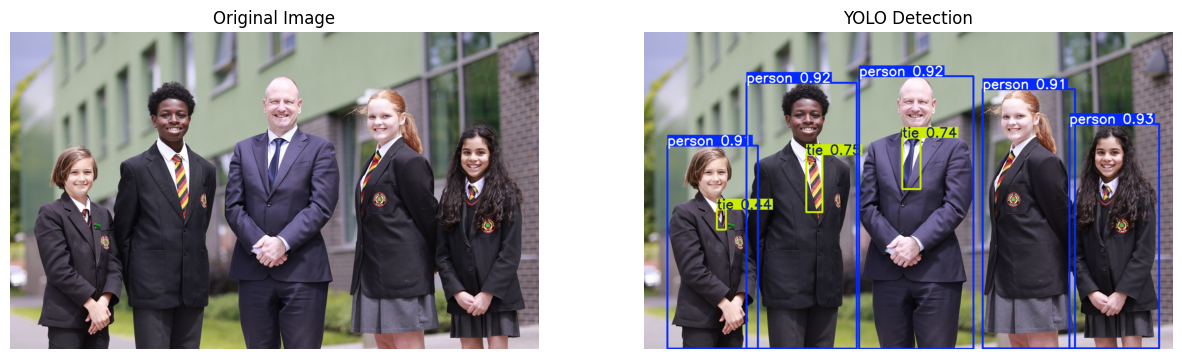

In [5]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from google.colab import files


uploaded = files.upload()
image_path = list(uploaded.keys())[0]
print("Image path:", image_path)

model = YOLO("yolov8n.pt")

results = model(image_path)

res_img = results[0].plot()

orig_img = cv2.imread(image_path)

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(res_img, cv2.COLOR_BGR2RGB))
plt.title("YOLO Detection")
plt.axis("off")

plt.show()

Saving photo_2024-01-30_23-07-34.jpg to photo_2024-01-30_23-07-34 (2).jpg

image 1/1 /content/photo_2024-01-30_23-07-34 (2).jpg: 384x640 16 persons, 6.3ms
Speed: 1.6ms preprocess, 6.3ms inference, 7.2ms postprocess per image at shape (1, 3, 384, 640)
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3,

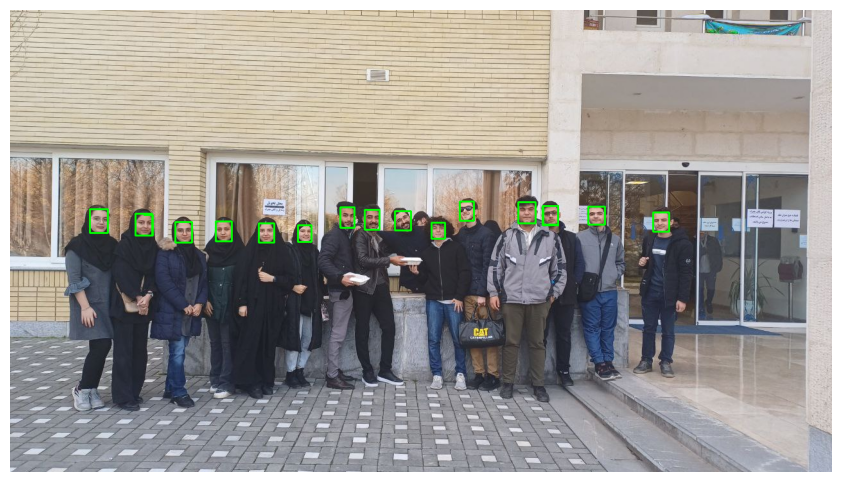

In [6]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
import insightface
from insightface.app import FaceAnalysis


uploaded = files.upload()
image_path = list(uploaded.keys())[0]


model = YOLO("yolov8n.pt")


results = model(image_path, classes=[0], conf=0.25)  # 0 = person in COCO dataset


img = cv2.imread(image_path)


app = FaceAnalysis(name="buffalo_l")
app.prepare(ctx_id=0, det_size=(640, 640))


for box in results[0].boxes.xyxy.cpu().numpy():
    x1, y1, x2, y2 = map(int, box[:4])
    person_crop = img[y1:y2, x1:x2]


    faces = app.get(person_crop)

    for face in faces:
        fx1, fy1, fx2, fy2 = face.bbox.astype(int)
        cv2.rectangle(person_crop, (fx1, fy1), (fx2, fy2), (0, 255, 0), 2)


    img[y1:y2, x1:x2] = person_crop


plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

عکس صحنه (مداربسته) را آپلود کنید:


Saving photo_2024-01-30_23-07-34.jpg to photo_2024-01-30_23-07-34 (3).jpg
عکس ۳x۴ خود را آپلود کنید:


Saving cropped-radin1.jpg to cropped-radin1.jpg


/usr/local/lib/python3.12/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:123: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)

image 1/1 /

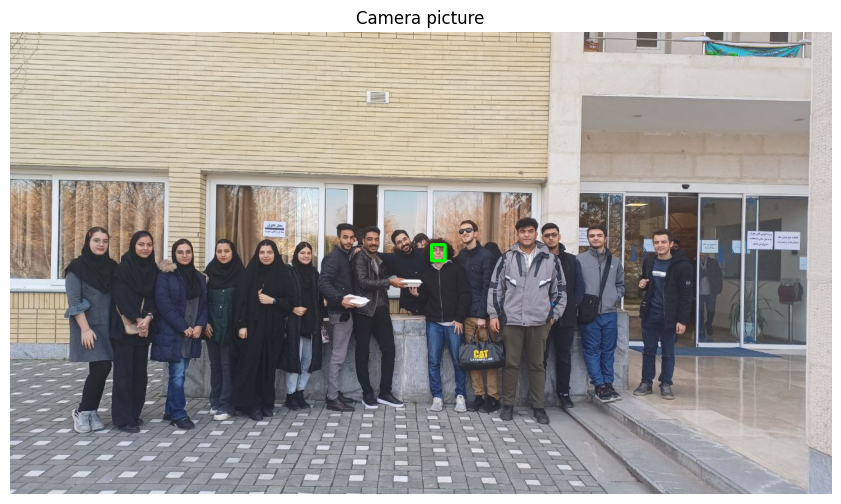

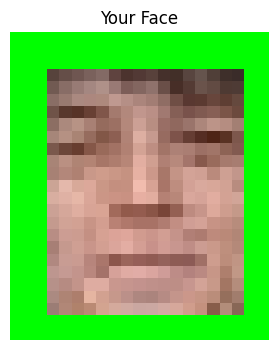

In [7]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
from insightface.app import FaceAnalysis
from google.colab import files
from sklearn.metrics.pairwise import cosine_similarity

# Upload scene image (CCTV)
print("Upload the scene image (CCTV):")
uploaded = files.upload()
scene_path = list(uploaded.keys())[0]

# Upload reference image (passport-size 3x4 of yourself)
print("Upload your 3x4 reference image:")
uploaded_ref = files.upload()
ref_path = list(uploaded_ref.keys())[0]

# Load YOLO model (detect person)
model = YOLO("yolov8n.pt")

# Load InsightFace model
app = FaceAnalysis(name="buffalo_l")
app.prepare(ctx_id=0, det_size=(640, 640))

# Read images
scene_img = cv2.imread(scene_path)
ref_img = cv2.imread(ref_path)

# Get embedding from reference image
ref_faces = app.get(ref_img)
if len(ref_faces) == 0:
    raise ValueError("No face detected in the reference image!")
ref_embedding = ref_faces[0].embedding.reshape(1, -1)

# Run YOLO to detect persons
results = model(scene_path, classes=[0], conf=0.25)

best_face = None
best_score = -1
best_crop = None

# Process detected persons
for box in results[0].boxes.xyxy.cpu().numpy():
    x1, y1, x2, y2 = map(int, box[:4])
    person_crop = scene_img[y1:y2, x1:x2]

    # Detect faces inside person_crop
    faces = app.get(person_crop)

    for face in faces:
        fx1, fy1, fx2, fy2 = face.bbox.astype(int)
        face_crop = person_crop[fy1:fy2, fx1:fx2]

        # Compute similarity with reference image
        face_embedding = face.embedding.reshape(1, -1)
        score = cosine_similarity(ref_embedding, face_embedding)[0][0]

        # If this is the most similar face → save it
        if score > best_score:
            best_score = score
            best_face = (x1+fx1, y1+fy1, x1+fx2, y1+fy2)
            best_crop = face_crop

# Show the full image with a rectangle on the best matching face
if best_face:
    bx1, by1, bx2, by2 = best_face
    cv2.rectangle(scene_img, (bx1, by1), (bx2, by2), (0, 255, 0), 3)

    plt.figure(figsize=(12, 6))
    plt.imshow(cv2.cvtColor(scene_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Scene Image (CCTV)")
    plt.show()

    # Show cropped face
    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(best_crop, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Detected Face")
    plt.show()
else:
    print("No matching face found!")


Saving photo_2024-01-30_23-07-34.jpg to photo_2024-01-30_23-07-34 (2).jpg


Saving cropped-radin1.jpg to cropped-radin1 (6).jpg
*************** EP Error ***************
EP Error /onnxruntime_src/onnxruntime/core/providers/cuda/cuda_call.cc:129 std::conditional_t<THRW, void, onnxruntime::common::Status> onnxruntime::CudaCall(ERRTYPE, const char*, const char*, SUCCTYPE, const char*, const char*, int) [with ERRTYPE = cudaError; bool THRW = true; SUCCTYPE = cudaError; std::conditional_t<THRW, void, common::Status> = void] /onnxruntime_src/onnxruntime/core/providers/cuda/cuda_call.cc:121 std::conditional_t<THRW, void, onnxruntime::common::Status> onnxruntime::CudaCall(ERRTYPE, const char*, const char*, SUCCTYPE, const char*, const char*, int) [with ERRTYPE = cudaError; bool THRW = true; SUCCTYPE = cudaError; std::conditional_t<THRW, void, common::Status> = void] CUDA failure 35: CUDA driver version is insufficient for CUDA runtime version ; GPU=-1 ; hostname=9f7f153768af ; file=/onnxruntime_src/onnxruntime/core/providers/cuda/cuda_execution_provider.cc ; line=282 ;

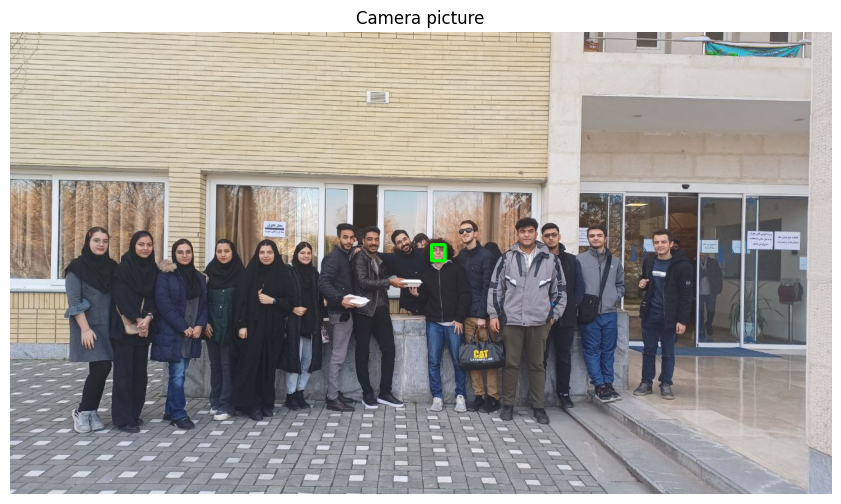

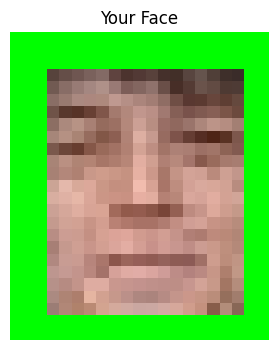

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
from insightface.app import FaceAnalysis
from sklearn.metrics.pairwise import cosine_similarity
from google.colab import files

def ditectperson(cam_picture, person_picture):
    # Get file paths
    cam_path = list(cam_picture.keys())[0]
    person_path = list(person_picture.keys())[0]

    # Load models
    yl_model = YOLO("yolov8n.pt")
    fa_model = FaceAnalysis(name="buffalo_l")
    fa_model.prepare(ctx_id=0, det_size=(640, 640))

    # Read images
    cam_img = cv2.imread(cam_path)
    man_img = cv2.imread(person_path)

    # Extract embedding from reference face
    ref_faces = fa_model.get(man_img)
    if len(ref_faces) == 0:
        raise ValueError("No face detected in the reference image!")

    ref_embedding = ref_faces[0].embedding.reshape(1, -1)

    # Run YOLO on the scene image to detect persons
    results = yl_model(cam_path, classes=[0], conf=0.25)

    best_face = None
    best_score = -1
    best_crop = None

    # Process detected persons
    for box in results[0].boxes.xyxy.cpu().numpy():
        x1, y1, x2, y2 = map(int, box[:4])
        person_crop = cam_img[y1:y2, x1:x2]

        faces = fa_model.get(person_crop)
        for face in faces:
            fx1, fy1, fx2, fy2 = face.bbox.astype(int)
            face_crop = person_crop[fy1:fy2, fx1:fx2]

            # Compute similarity with reference
            face_embedding = face.embedding.reshape(1, -1)
            score = cosine_similarity(ref_embedding, face_embedding)[0][0]

            # Save the best match
            if score > best_score:
                best_score = score
                best_face = (x1+fx1, y1+fy1, x1+fx2, y1+fy2)
                best_crop = face_crop

    # Show result
    if best_face:
        bx1, by1, bx2, by2 = best_face
        cv2.rectangle(cam_img, (bx1, by1), (bx2, by2), (0, 255, 0), 3)

        plt.figure(figsize=(12, 6))
        plt.imshow(cv2.cvtColor(cam_img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title("Scene Image (CCTV)")
        plt.show()

        plt.figure(figsize=(4, 4))
        plt.imshow(cv2.cvtColor(best_crop, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title("Detected Face")
        plt.show()
    else:
        print("No matching face found!")


# Run function with two uploads (scene + reference)
ditectperson(files.upload(), files.upload())


In [ ]:
class FaceRecognizer:
    def __init__(self, yolo_model="yolov8n.pt", face_model="buffalo_l"):
        self.yolo = YOLO(yolo_model)
        self.face = FaceAnalysis(name=face_model)
        self.face.prepare(ctx_id=0, det_size=(640, 640))

    def predict(self, cam_path, ref_path):
        cam_img = cv2.imread(cam_path)
        ref_img = cv2.imread(ref_path)

        # Get reference embedding
        ref_faces = self.face.get(ref_img)
        if len(ref_faces) == 0:
            return {"found": False, "error": "No face in reference"}

        ref_embedding = ref_faces[0].embedding.reshape(1, -1)

        # Detect persons in the scene
        results = self.yolo(cam_path, classes=[0], conf=0.25)

        best_score = -1
        best_face = None

        for box in results[0].boxes.xyxy.cpu().numpy():
            x1, y1, x2, y2 = map(int, box[:4])
            person_crop = cam_img[y1:y2, x1:x2]
            faces = self.face.get(person_crop)

            for face in faces:
                emb = face.embedding.reshape(1, -1)
                score = cosine_similarity(ref_embedding, emb)[0][0]

                if score > best_score:
                    best_score = score
                    best_face = (x1, y1, x2, y2)

        return {
            "found": best_face is not None,
            "score": float(best_score),
            "bbox": best_face
        }


# Upload images (scene + reference)
uploaded = files.upload()
cam_path = list(uploaded.keys())[0]

uploaded_ref = files.upload()
ref_path = list(uploaded_ref.keys())[0]

# Run recognition
ai = FaceRecognizer()
prediction = ai.predict(cam_path, ref_path)
print(prediction)


Saving photo_2025-08-22_23-33-55.jpg to photo_2025-08-22_23-33-55 (5).jpg


Saving photo_2025-09-26_20-57-12.jpg to photo_2025-09-26_20-57-12 (1).jpg
*************** EP Error ***************
EP Error /onnxruntime_src/onnxruntime/core/providers/cuda/cuda_call.cc:129 std::conditional_t<THRW, void, onnxruntime::common::Status> onnxruntime::CudaCall(ERRTYPE, const char*, const char*, SUCCTYPE, const char*, const char*, int) [with ERRTYPE = cudaError; bool THRW = true; SUCCTYPE = cudaError; std::conditional_t<THRW, void, common::Status> = void] /onnxruntime_src/onnxruntime/core/providers/cuda/cuda_call.cc:121 std::conditional_t<THRW, void, onnxruntime::common::Status> onnxruntime::CudaCall(ERRTYPE, const char*, const char*, SUCCTYPE, const char*, const char*, int) [with ERRTYPE = cudaError; bool THRW = true; SUCCTYPE = cudaError; std::conditional_t<THRW, void, common::Status> = void] CUDA failure 35: CUDA driver version is insufficient for CUDA runtime version ; GPU=-1 ; hostname=9f7f153768af ; file=/onnxruntime_src/onnxruntime/core/providers/cuda/cuda_execution_pr

In [ ]:
# import cv2
# from google.colab import files
# from ultralytics import YOLO
# from insightface.app import FaceAnalysis
# from sklearn.metrics.pairwise import cosine_similarity

# class FaceRecognizer:
#     def __init__(self, yolo_model="yolov8n.pt", face_model="buffalo_l"):
#         self.yolo = YOLO(yolo_model)
#         self.face = FaceAnalysis(name=face_model)
#         self.face.prepare(ctx_id=0, det_size=(640, 640))

#     def predict_frame(self, frame, ref_embedding):
#         results = self.yolo.predict(frame, classes=[0], conf=0.25, verbose=False)
#         best_score = -1
#         best_face = None

#         for box in results[0].boxes.xyxy.cpu().numpy():
#             x1, y1, x2, y2 = map(int, box[:4])
#             person_crop = frame[y1:y2, x1:x2]
#             faces = self.face.get(person_crop)

#             for face in faces:
#                 emb = face.embedding.reshape(1, -1)
#                 score = cosine_similarity(ref_embedding, emb)[0][0]
#                 if score > best_score:
#                     best_score = score
#                     best_face = (x1, y1, x2, y2)

#         return best_face, best_score


# # لود عکس مرجع فقط یک بار
# ai = FaceRecognizer()

# uploaded_ref = files.upload()
# ref_path = list(uploaded_ref.keys())[0]

# ref_img = cv2.imread(ref_path)
# ref_faces = ai.face.get(ref_img)
# ref_embedding = ref_faces[0].embedding.reshape(1, -1)

# # شروع ویدئو
# cap = cv2.VideoCapture(0)  # عدد 0 یعنی وبکم داخلی
# while True:
#     ret, frame = cap.read()
#     if not ret:
#         break

#     bbox, score = ai.predict_frame(frame, ref_embedding)

#     if bbox is not None:
#         x1, y1, x2, y2 = bbox
#         cv2.rectangle(frame, (x1,y1), (x2,y2), (0,255,0), 2)
#         cv2.putText(frame, f"Score: {score:.2f}", (x1, y1-10),
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

#     cv2.imshow("Live Camera", frame)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()

Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'sdpa_kernel': '0', 'use_tf32': '1', 'fuse_conv_bias': '0', 'prefer_nhwc': '0', 'tunable_op_max_tuning_duration_ms': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_tuning_enable': '0', 'tunable_op_enable': '0', 'use_ep_level_unified_stream': '0', 'device_id': '0', 'has_user_compute_stream': '0', 'gpu_external_empty_cache': '0', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'cudnn_conv1d_pad_to_nc1d': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_alloc': '0', 'gpu_external_free': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'do_copy_in_default_stream': '1', 'enable_cuda_graph': '0', 'user_compute_stream': '0', 'cudnn_conv_use_max_workspace': '1'}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with o

Saving photo_2025-09-26_22-24-06.jpg to photo_2025-09-26_22-24-06.jpg
